House Price Prediction

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from termcolor import colored as cl

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import ElasticNet 

from sklearn.metrics import explained_variance_score as evs 
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid') 
plt.rcParams['figure.figsize'] = (6, 4) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('house_data.csv')
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


In [3]:
pd.isnull(data)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,False,False,False,False,False,False,False,False,False,False,False,False,False
16609,False,False,False,False,False,False,False,False,False,False,False,False,False
16610,False,False,False,False,False,False,False,False,False,False,False,False,False
16611,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data.dropna(inplace = True)
print(cl(data.isnull().sum(), attrs = ['bold']))

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
dtype: int64


In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000


In [6]:
print(cl(data.dtypes, attrs = ['bold']))

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
dtype: object


Correlation Matrix

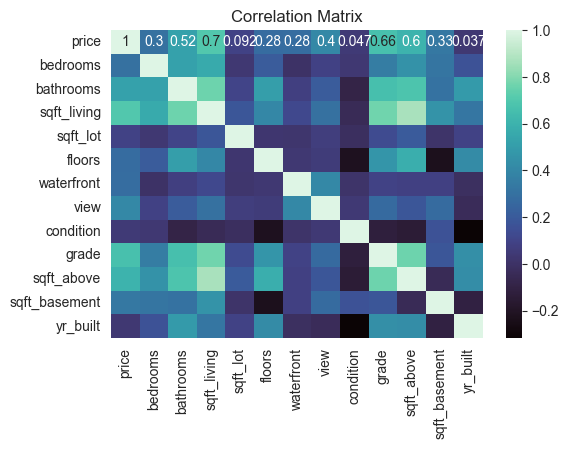

In [7]:
sns.heatmap(data.corr(), annot = True, cmap = 'mako')
plt.savefig('heatmap.png')
plt.title("Correlation Matrix")
plt.show()

Pairplot

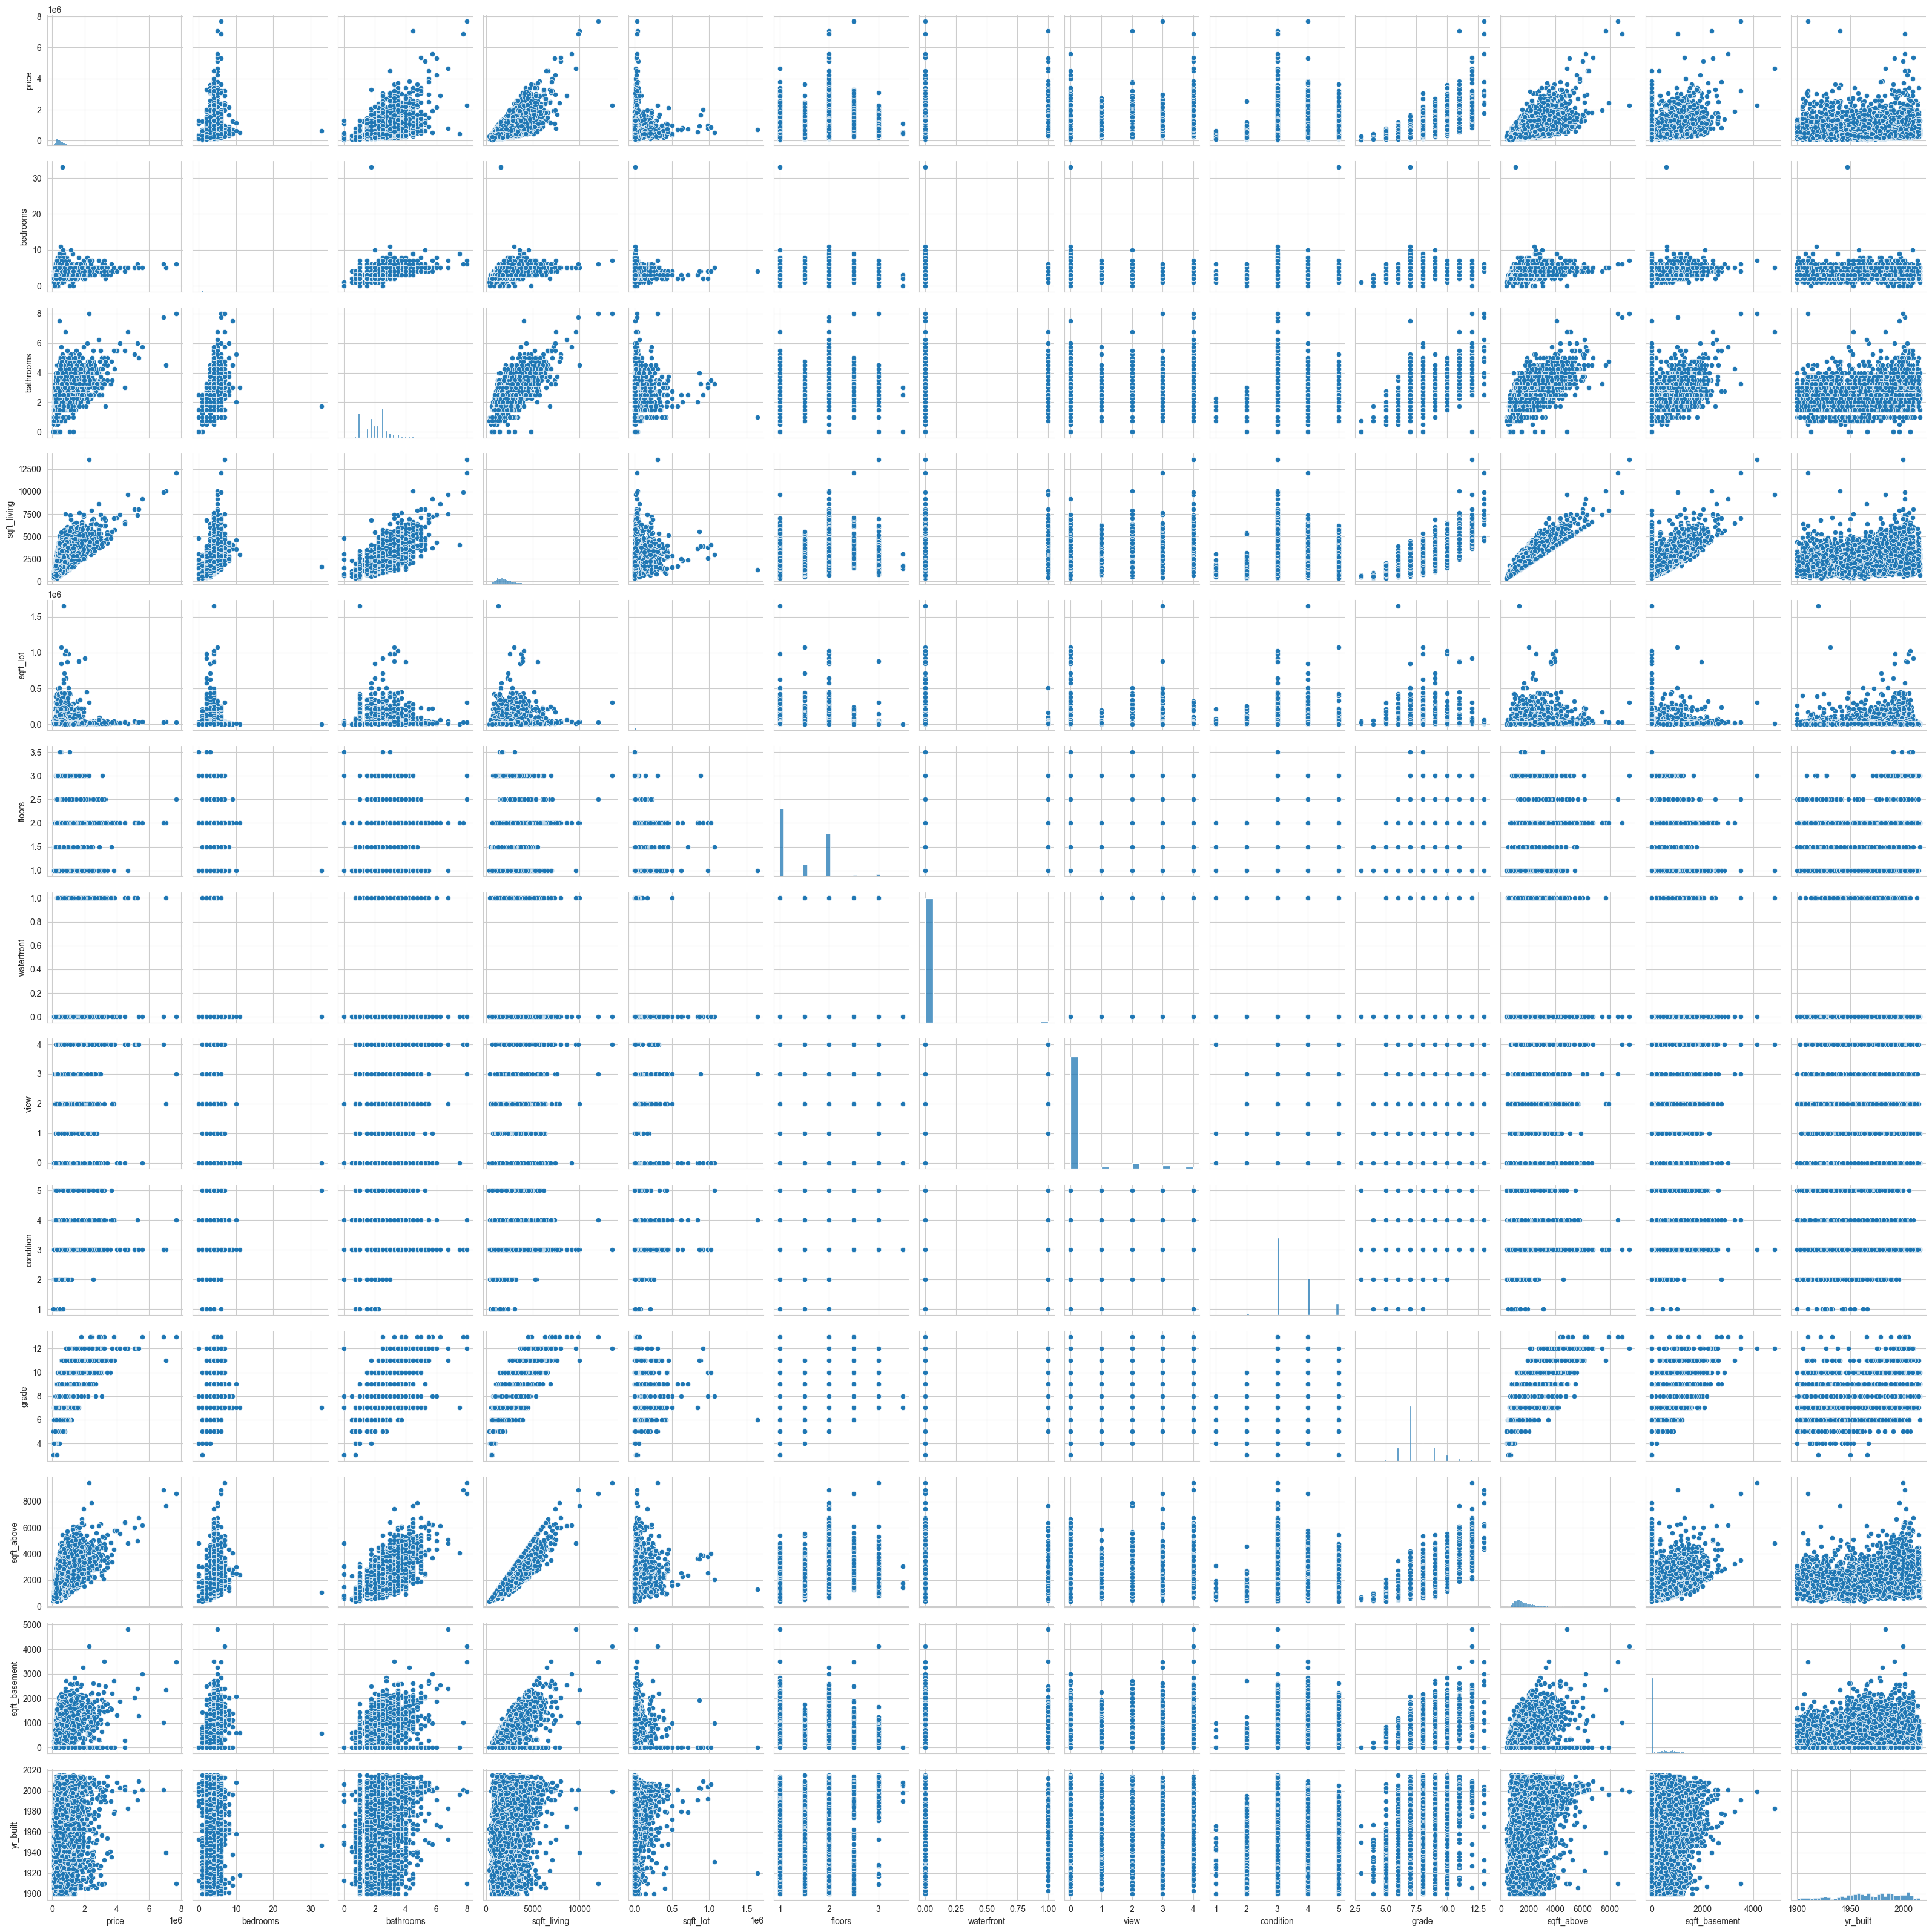

In [8]:
sns.pairplot(data)
plt.show()

In [9]:
X=data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built']]
y=data['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
mean = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squares Error :",mean)
print("R-squared :",r2)

Mean Squares Error : 50049073158.66726
R-squared : 0.6719419137975702


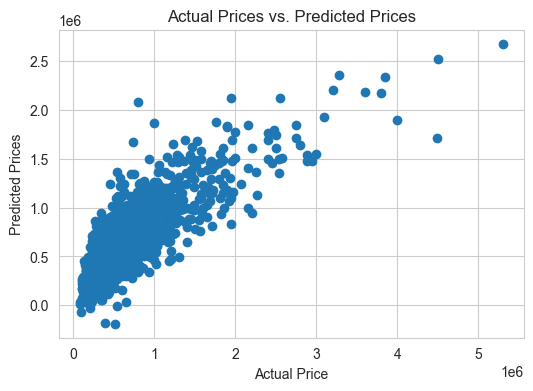

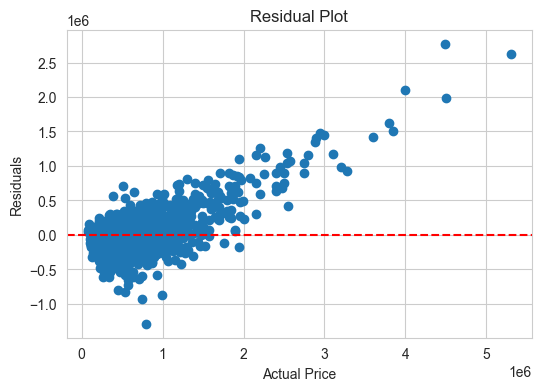

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0,color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [14]:
new_data = [[3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987]]
predicted_price = model.predict(new_data)
print("Predicted Price : ",predicted_price[0])

Predicted Price :  431732.32854331564
